# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Alif Putra Cira
- **Email:** alifpc.professional@gmail.com
- **ID Dicoding:** alif_putra_cira_8QzA

## Menentukan Pertanyaan Bisnis

- Kapan waktu puncak dan waktu sepi dalam penyewaan sepeda per jam?
- Musim apa yang paling diminati dalam penyewaan sepeda sesuai jenis pengguna ?
- Apakah faktor cuaca memengaruhi jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [208]:
#load data day
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [209]:
#Load data hour
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [210]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [211]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [212]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [213]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [214]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [215]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Cleaning Data day_df

In [216]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

# Menampilkan lima baris pertama dari dataframe day_df setelah penggantian nama kolom
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [217]:
# Mengubah angka menjadi keterangan pada kolom 'month'
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Mengubah angka menjadi keterangan pada kolom 'season'
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Mengubah angka menjadi keterangan pada kolom 'weekday'
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

# Mengubah angka menjadi keterangan pada kolom 'weather_cond'
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear to Partly cloudy',
    2: 'Mist',
    3: 'Light Snow to Rain',
    4: 'Heavy Rain, Snow + Fog',
})

In [218]:
# Mengubah tipe data kolom 'dateday' menjadi tipe data datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

In [219]:
# Mengubah tipe data kolom-kolom tertentu menjadi tipe data categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

In [220]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weather_cond  731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

In [221]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear to Partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear to Partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear to Partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


####  Data hour_df

In [222]:
# Mengubah nama judul kolom
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

# Menampilkan lima baris pertama dari dataframe hour_df setelah penggantian nama kolom
hour_df.head()


,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [223]:
# Mengubah angka menjadi keterangan pada kolom 'month'
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Mengubah angka menjadi keterangan pada kolom 'season'
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Mengubah angka menjadi keterangan pada kolom 'weekday'
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

# Mengubah angka menjadi keterangan pada kolom 'weather_cond'
hour_df['weather_cond'] = hour_df['weather_cond'].map({
    1: 'Clear to Partly cloudy',
    2: 'Mist',
    3: 'Light Snow to Rain',
    4: 'Heavy Rain, Snow + Fog'
})


In [224]:
# Mengubah tipe data kolom 'dateday' menjadi tipe data datetime
hour_df['dateday'] = pd.to_datetime(hour_df.dateday)

In [225]:
# Mengubah tipe data kolom-kolom tertentu menjadi tipe data categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather_cond'] = hour_df.weather_cond.astype('category')

In [226]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   year          17379 non-null  category      
 4   month         17379 non-null  category      
 5   hr            17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weather_cond  17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

In [227]:
hour_df.head()

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear to Partly cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear to Partly cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear to Partly cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear to Partly cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear to Partly cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore data all_df

In [228]:
# Menggabungkan data dari dataframe hour_df dan dataframe day_df menjadi satu dataframe baru yang disebut all_df
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="inner",
    left_on="dateday",
    right_on="dateday",
    suffixes=("", "_daily")
)

# Melakukan drop terhadap beberapa kolom yang dianggap tidak diperlukan
for column in all_df.columns:
    if "_daily" in column: 
        if column != "count_daily" and column != "casual_daily" and column != "registered_daily":
            all_df = all_df.drop([column], axis=1)

# Menampilkan lima baris pertama dari dataframe all_df setelah penggabungan dan penghapusan kolom
all_df.head()


,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count,casual_daily,registered_daily,count_daily
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear to Partly cloudy,0.24,0.2879,0.81,0.0,3,13,16,331,654,985
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear to Partly cloudy,0.22,0.2727,0.80,0.0,8,32,40,331,654,985
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear to Partly cloudy,0.22,0.2727,0.80,0.0,5,27,32,331,654,985
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear to Partly cloudy,0.24,0.2879,0.75,0.0,3,10,13,331,654,985
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear to Partly cloudy,0.24,0.2879,0.75,0.0,0,1,1,331,654,985


In [229]:
# Menetapkan urutan hari dalam seminggu
day_order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
all_df["weekday"] = pd.Categorical(all_df["weekday"], categories=day_order, ordered=True)

# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung statistik rata-rata dan jumlah peminjaman sepeda
day_stats = all_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["mean","sum"],
    "registered": ["mean","sum"],
    "count": ["mean","sum"]
}).sort_values(by="weekday")

day_stats

C:\Users\62813\AppData\Local\Temp\ipykernel_17044\2755620655.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_stats = all_df.groupby(by="weekday").agg({


instant     casual          registered               count        
        nunique       mean     sum        mean     sum        mean     sum
weekday                                                                   
Sun        2502  56.163469  140521  121.305356  303506  177.468825  444027
Mon        2479  28.553449   70784  155.191206  384719  183.744655  455503
Tue        2453  23.580514   57843  167.658377  411266  191.238891  469109
Wed        2475  23.159192   57319  167.971313  415729  191.130505  473048
Thu        2471  24.872521   61460  171.564144  423935  196.436665  485395
Fri        2487  31.458786   78238  164.677121  409552  196.135907  487790
Sat        2512  61.246815  153852  128.962978  323955  190.209793  477807

In [230]:
# Mengelompokkan data berdasarkan musim dan menghitung statistik rata-rata dan jumlah peminjaman sepeda
season_stats = all_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["mean","sum"],
    "registered": ["mean","sum"],
    "count": ["mean","sum"]
})

season_stats

C:\Users\62813\AppData\Local\Temp\ipykernel_17044\831857018.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_stats = all_df.groupby(by="season").agg({


instant     casual          registered               count         
       nunique       mean     sum        mean     sum        mean      sum
season                                                                    
Fall      4496  50.287144  226091  185.729093  835038  236.016237  1061129
Spring    4242  14.290901   60622   96.823668  410726  111.114569   471348
Summer    4409  46.160581  203522  162.183488  715067  208.344069   918589
Winter    4232  30.666824  129782  168.202032  711831  198.868856   841613

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu puncak dan waktu sepi dalam penyewaan sepeda per jam?

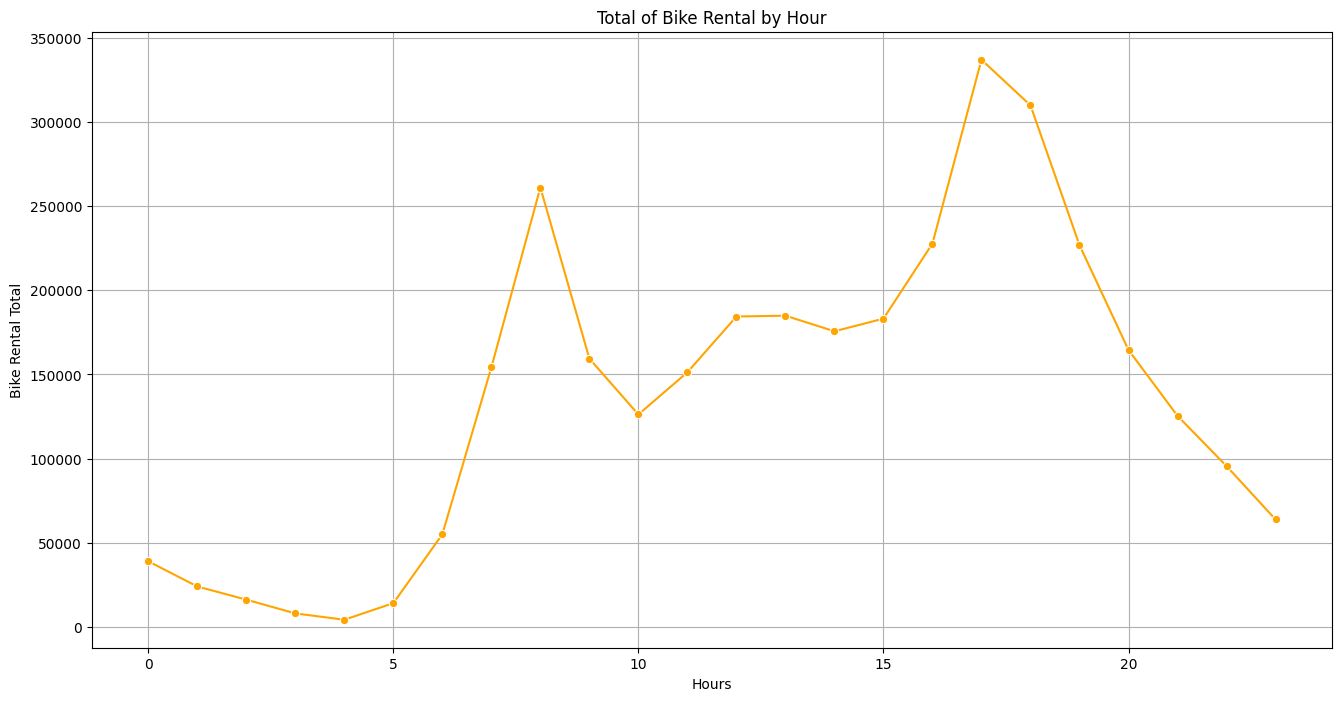

In [231]:
# Menetapkan data yang digunakan
total_rent_per_hour = all_df.groupby('hr')['count'].sum().reset_index()

# Membuat plot line chart
plt.figure(figsize = (16,8))
ax = sns.lineplot(data=total_rent_per_hour, x="hr", y="count", color='orange', errorbar=None, marker="o")
plt.xlabel("Hours")
plt.ylabel("Bike Rental Total")
plt.title("Total of Bike Rental by Hour")
plt.grid()
plt.show()

### Pertanyaan 2: Musim apa yang paling diminati dalam penyewaan sepeda sesuai jenis pengguna ?

C:\Users\62813\AppData\Local\Temp\ipykernel_17044\1725036184.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


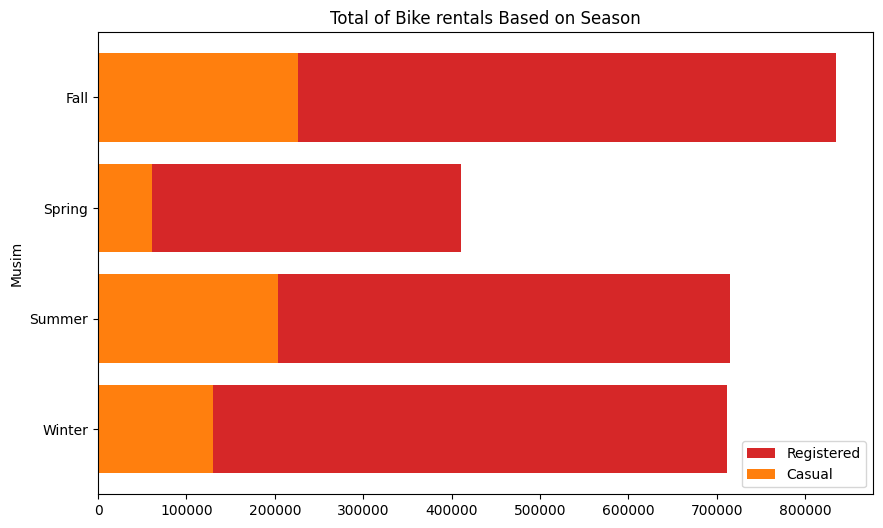

In [232]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat barplot horizontal
plt.barh(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:red'
)

plt.barh(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.ylabel('Musim')  # Menjadikan musim sebagai label sumbu y
plt.xlabel(None)
plt.title('Total of Bike rentals Based on Season')
plt.gca().invert_yaxis()  # Membalik urutan sumbu y agar musim terurut dari atas ke bawah
plt.legend()
plt.show()


### Pertanyaan 3: Apakah faktor cuaca memengaruhi jumlah pengguna sepeda?

C:\Users\62813\AppData\Local\Temp\ipykernel_17044\3636363887.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_con = all_df.groupby('weather_cond')['count'].mean().reset_index()


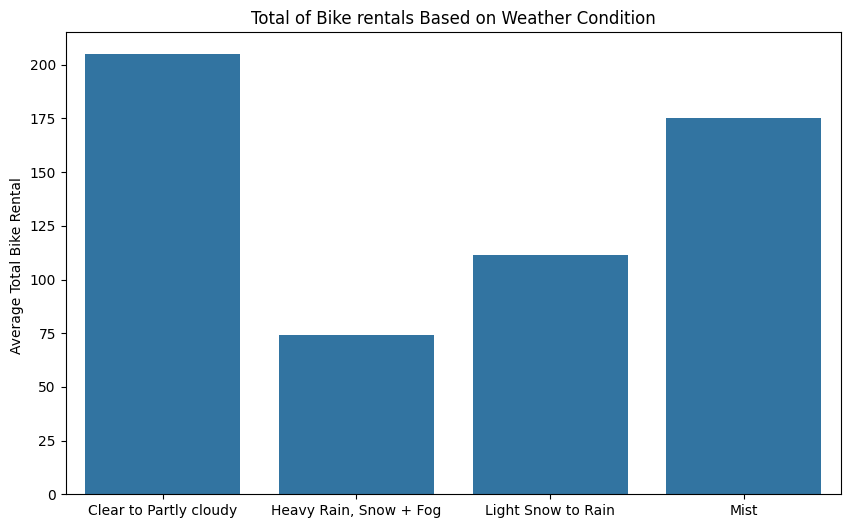

In [233]:
weather_con = all_df.groupby('weather_cond')['count'].mean().reset_index()

weather_con
plt.figure(figsize=(10,6))
sns.barplot(
    x=weather_con['weather_cond'],
    y=weather_con['count'],
    data=all_df)

plt.title('Total of Bike rentals Based on Weather Condition')
plt.xlabel('')
plt.ylabel('Average Total Bike Rental ')
plt.show()


## Conclusion

- Kapan waktu puncak dan waktu sepi dalam penyewaan sepeda per jam?<br>
Berdasarkan grafik tersebut, terdapat dua waktu puncak dalam jumlah penyewaan sepeda, yaitu pada jam 8 pagi dan jam 5 sore. Penurunan signifikan dalam jumlah penyewaan sepeda pada jam 8 pagi menunjukkan bahwa sebagian besar orang menggunakan sepeda sebagai sarana transportasi untuk pergi ke tempat kerja atau sekolah. Sementara itu, peningkatan jumlah penyewaan sepeda pada jam 5 sore menunjukkan bahwa sepeda juga banyak digunakan sebagai sarana transportasi untuk pulang dari tempat kerja atau sekolah. Pola ini menunjukkan bahwa ada tren penurunan penggunaan sepeda sepanjang pagi dan siang hari setelah mencapai puncak pada jam 8 pagi, kemungkinan karena orang-orang sudah mencapai tujuan mereka dan tidak lagi membutuhkan sepeda. Terakhir, jumlah penyewaan sepeda terendah terjadi pada jam 4 pagi, menandakan bahwa waktu ini adalah periode paling sepi dalam penggunaan layanan penyewaan sepeda. Dengan demikian, grafik ini memberikan wawasan yang penting bagi penyedia layanan sepeda untuk merencanakan operasional mereka, seperti menyiapkan lebih banyak sepeda pada jam-jam sibuk dan melakukan pemeliharaan pada jam-jam sepi.

- Musim apa yang paling diminati dalam penyewaan sepeda sesuai jenis pengguna ?<br>
Dari grafik yang tersedia, tampak bahwa musim yang paling diminati untuk penyewaan sepeda adalah musim gugur. Baik pengguna terdaftar maupun pengguna kasual menunjukkan minat yang tinggi, dengan jumlah total penyewaan sepeda pada musim gugur lebih tinggi dibandingkan dengan musim lainnya. Lebih spesifik lagi, jumlah penyewaan sepeda mencapai puncaknya selama musim gugur, di mana baik pengguna terdaftar maupun pengguna kasual sama-sama menyewa sepeda dalam jumlah yang besar. Sedangkan di musim semi dan musim panas, jumlah penyewaan sepeda juga cukup tinggi, meskipun tidak sebanyak di musim gugur. Sementara itu, musim dingin menunjukkan jumlah penyewaan sepeda yang paling rendah, mungkin karena cuaca yang dingin membuat orang kurang cenderung untuk bersepeda. Dengan melihat grafik pula dapat kita lihat bahwa terdapat kecenderungan bahwa pengguna terdaftar menyewa sepeda lebih banyak dibandingkan pengguna kasual di setiap musim. Hal ini bisa saja menunjukkan bahwa pengguna terdaftar lebih sering menggunakan sepeda sebagai sarana transportasi sehari-hari, sementara pengguna kasual lebih cenderung menyewa sepeda untuk kegiatan rekreasi atau pariwisata, yang mungkin saja dipengaruhi oleh musim.

- Apakah faktor cuaca memengaruhi jumlah pengguna sepeda?<br>
Ya, faktor cuaca memang memiliki pengaruh yang signifikan pada jumlah pengguna sepeda, seperti yang terlihat dari grafik. Terjadi peningkatan jumlah penyewaan sepeda saat cuaca cerah hingga berawan sedikit, menandakan bahwa kondisi cuaca yang baik mendorong lebih banyak orang untuk bersepeda. Di sisi lain, pada kondisi cuaca yang buruk seperti hujan lebat, salju, dan kabut, jumlah penyewaan sepeda mencapai titik terendah. Hal ini menunjukkan bahwa kondisi cuaca yang tidak mendukung dapat menghalangi orang untuk bersepeda.

In [234]:
# Meyimpanan dataframe pada file CSV baru
all_df.to_csv('all.csv', index=False)